# Predicting Heart Disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
In a statement,
> Given clinical parameters about a patient can we prediict whether or not they have heart disease?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease).

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features
**Create data dictionary**

* age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    * 0 = typical angina
    * 1 = atypical angina
    * 2 = non — anginal pain
    * 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then :
    * 1 (true) else :
    * 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results
    * 0 = normal
    * 1 = having ST-T wave abnormality
    * 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina :
    * 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment :
    * 0 = upsloping: better heart rate with excercise (uncommon)
    * 1 = flat: minimal change (typical healthy heart)
    * 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia :
    * 1,3 = normal 6 = fixed defect
    * 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not :
    * 1 = yes 0 = no


## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.

In [86]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis and plotting libraries)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to apear inside the notebook
%matplotlib inline
plt.style.use("ggplot")

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load Data

In [87]:
!pip install kaggle

In [88]:
!kaggle datasets download -d sumaiyatasmeem/heart-disease-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset
License(s): CC0-1.0
heart-disease-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
# !unzip heart-disease-classification-dataset.zip
# Already done

In [90]:
df = pd.read_csv("heart disease classification dataset.csv", usecols=lambda column: column != 'Unnamed: 0')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [91]:
# Making some changes to the data, since they have to be all numerical.

# Turning the target column into numbers
df.loc[df["target"] == "yes", "target" ] = 1
df.loc[df["target"] == "no", "target" ] = 0

# Turning the sex variable into numbers
df.loc[df["sex"] == "female", "sex"] = 0
df.loc[df["sex"] == "male", "sex" ] = 1

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0


## Data Exploration (Exploratory analysis or EDA)

The gooal here is to find out more a bout the data and become a subject matter expert on the dataset you're working with.

1. What wuestion(s) are you trying to solve?
2. What kind of data do you have and how do we treat different types?
3. What's missin from the data, how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remore features to get more out of your data?

In [92]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [93]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0
302,57,0,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,0


In [94]:
#df.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [95]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

Text(0, 0.5, 'Count of hearrt disease')

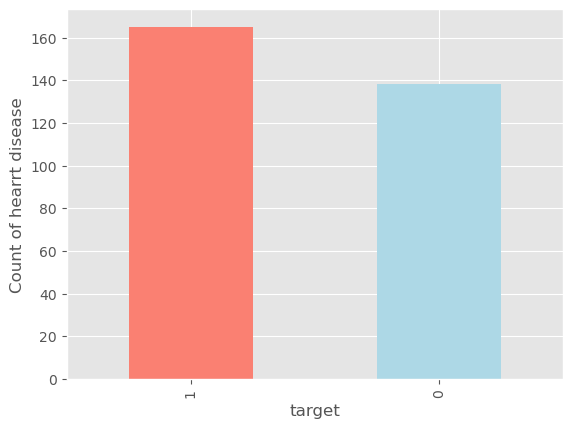

In [96]:
df["target"].value_counts().plot.bar(color=["salmon", "lightblue"])
plt.ylabel("Count of hearrt disease")

In [97]:
# Observation here, in the course target was numerical, in this one it's not.
# We've got to turn them all into numeric values so the machine understands
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [98]:
df["trestbps"].fillna(round(df["trestbps"].mean(), 0), inplace=True)

/var/folders/5z/wmmf0qk54n55kmw1cnp7123c0000gn/T/ipykernel_1550/523443043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["trestbps"].fillna(round(df["trestbps"].mean(), 0), inplace=True)


In [99]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [100]:
df["chol"].fillna(value=round(df["chol"].mean(),0), inplace=True)

/var/folders/5z/wmmf0qk54n55kmw1cnp7123c0000gn/T/ipykernel_1550/2220583101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chol"].fillna(value=round(df["chol"].mean(),0), inplace=True)


In [101]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [102]:
df["thalach"].isna().sum()

5

In [103]:
df["thalach"].fillna(round(df["thalach"].mean(),0), inplace=True)

/var/folders/5z/wmmf0qk54n55kmw1cnp7123c0000gn/T/ipykernel_1550/1255576947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["thalach"].fillna(round(df["thalach"].mean(),0), inplace=True)


In [104]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [105]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,132.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [107]:
# turn everything that's an object to an integer.

df["target"] = df["target"].astype(int)
df["sex"] = df["sex"].astype(int)

In [108]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,132.0,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,132.0,131.0,0,1,115.0,1,1.2,1,1,3,0


In [109]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.716172,246.316832,0.148515,0.528053,149.867987,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.511925,51.822276,0.356198,0.525860,22.376128,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frecuency according to sex


In [110]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

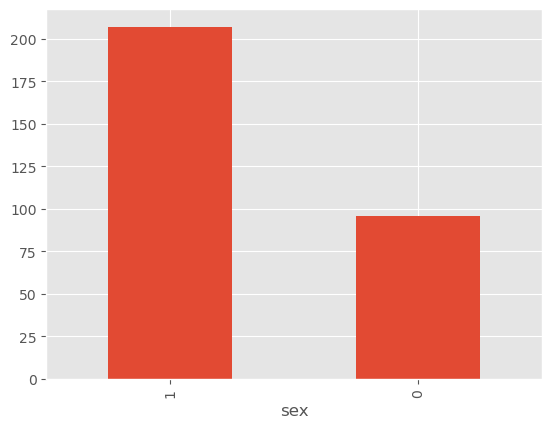

In [111]:
df["sex"].value_counts().plot(kind="bar")
plt.show()

### Compare target column with sex column

In [112]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

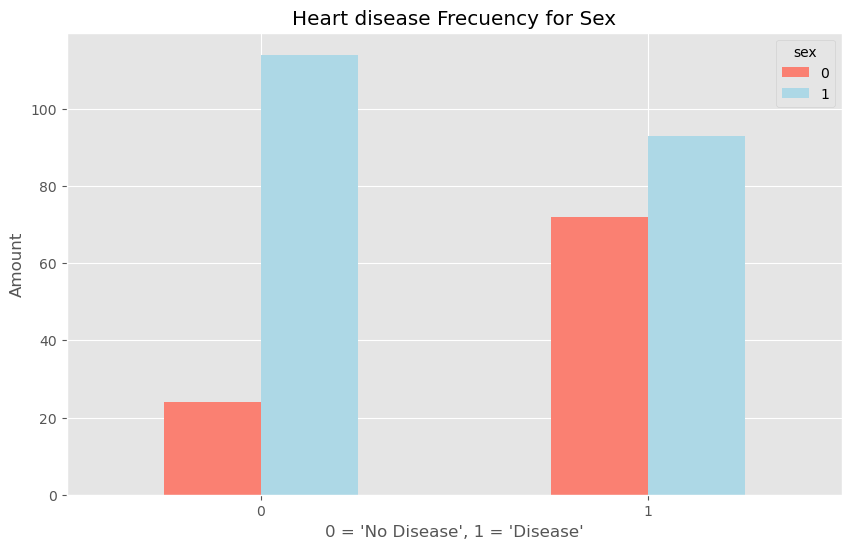

In [113]:
# If the participant is a woman, there would be a 72% chance, she has heart disease.
# Main thing to remember, it's to become a subject matter expert

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart disease Frecuency for Sex")
plt.xlabel("0 = 'No Disease', 1 = 'Disease'")
plt.ylabel("Amount")

# rotate the Xticks 
plt.xticks(rotation=0)

### Age vs max heart rate for Heart Disease

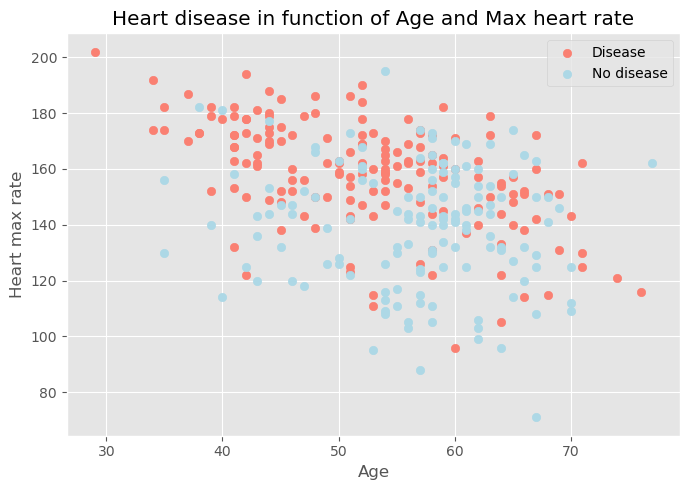

In [114]:
# Creating another figure
fig, ax = plt.subplots(figsize=(7, 5), ncols=1, nrows=1)


# Scatter plot with positive examples
ax.scatter(x=df.age[df.target == 1],
          y=df.thalach[df.target == 1],
          c="salmon")

ax.scatter(x=df.age[df.target == 0],
          y=df.thalach[df.target == 0],
          c="lightblue")

ax.set(
    title="Heart disease in function of Age and Max heart rate",
    xlabel = "Age",
    ylabel= "Heart max rate"
)

ax.legend(["Disease",  "No disease"])

plt.tight_layout()
plt.show()

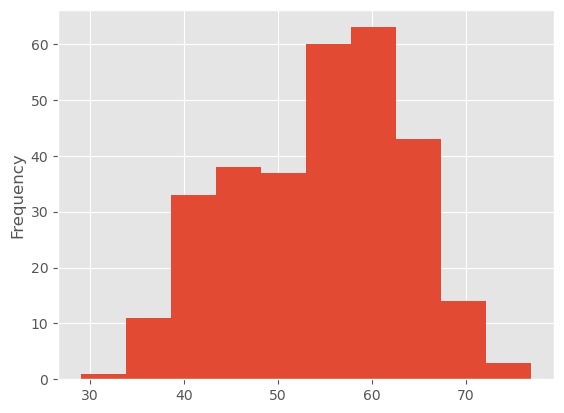

In [115]:
#  Check the distribution of the age column with the histogram.
df.age.plot.hist();

plt.show()

In [116]:
# If we did have someone up there that was 150, we'd have to clean the data.
# We'd tell if there's any outliers we'd have to check again the dist plot.

### Heart Disease Frecuency per Chest Pain Type

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    * 0 = typical angina
    * 1 = atypical angina
    * 2 = non — anginal pain
    * 3 = asymptotic


In [117]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

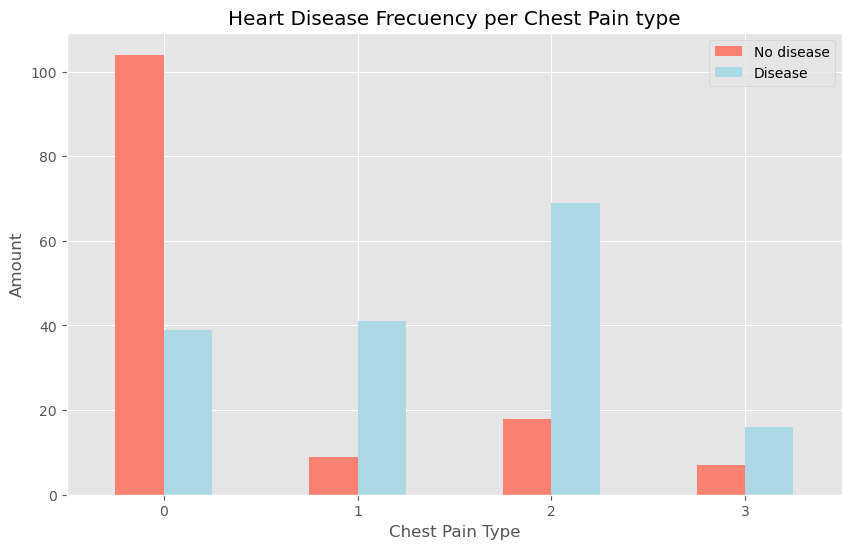

In [118]:
# Make the cross tab more vissual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6),
                                  color=["salmon", "lightblue"])

# add some communication
plt.title("Heart Disease Frecuency per Chest Pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")

plt.legend(["No disease", "Disease"], loc="best")
plt.xticks(rotation=0)

In [119]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,132.0,354.0,0,1,163.0,1,0.6,2,0,2,1


### Building a correlation matrix:
**What is that?**

A big table of numbers telling us how independent variable is related to each other.


In [120]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279306,0.213447,0.121308,-0.116211,-0.394348,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.063804,-0.197249,0.045032,-0.058196,-0.051022,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047848,-0.077875,0.094444,0.044421,0.299200,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279306,-0.063804,0.047848,1.000000,0.124981,0.175589,-0.110241,-0.029410,0.069670,0.193618,-0.120792,0.098134,0.060210,-0.141072
chol,0.213447,-0.197249,-0.077875,0.124981,1.000000,0.012870,-0.150147,-0.022714,0.066323,0.053045,-0.003042,0.070793,0.098296,-0.086369
fbs,0.121308,0.045032,0.094444,0.175589,0.012870,1.000000,-0.084189,0.001637,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110241,-0.150147,-0.084189,1.000000,0.037180,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.394348,-0.051022,0.299200,-0.029410,-0.022714,0.001637,0.037180,1.000000,-0.394664,-0.345449,0.378457,-0.207489,-0.105488,0.409616
exang,0.096801,0.141664,-0.394280,0.069670,0.066323,0.025665,-0.070733,-0.394664,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193618,0.053045,0.005747,-0.058770,-0.345449,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


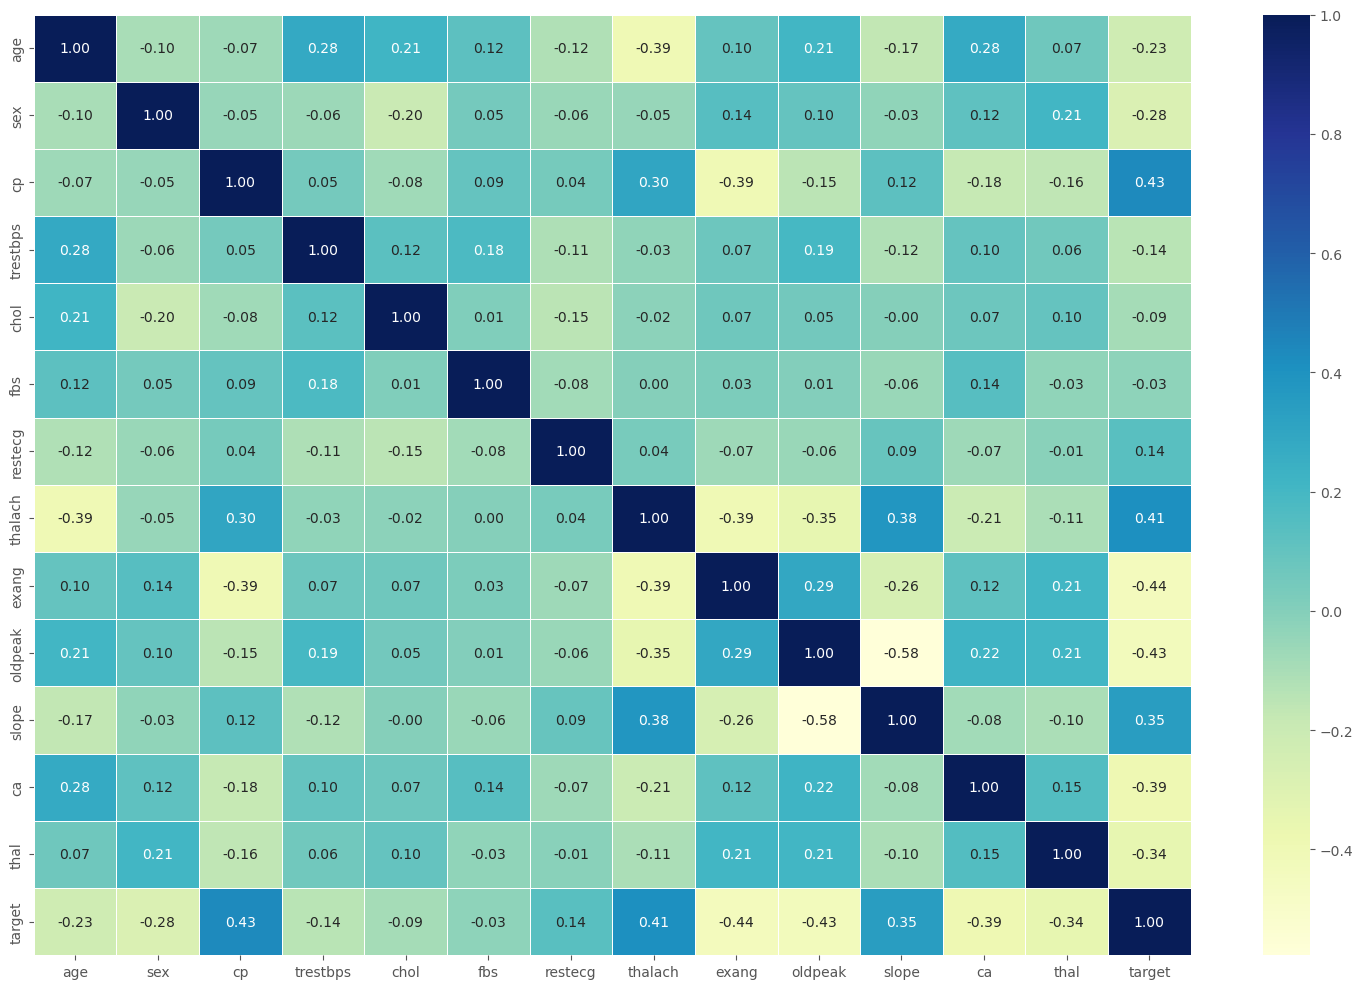

In [121]:
#  Let's make our correlation matrix, a little bit more visual (prettier).

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10), ncols=1, nrows=1)

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

plt.tight_layout()
plt.show()

## 5. Modeling

In [122]:
# Split  data into x and y

X = df.drop("target", axis=1);

y = df["target"]

In [123]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,132.0,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3
301,57,1,0,132.0,131.0,0,1,115.0,1,1.2,1,1,3


In [124]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [125]:
# Split data into train and test sets
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    train_size=0.8)


In [126]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120.0,295.0,0,1,162.0,0,0.0,2,0,2
202,58,1,0,150.0,270.0,0,0,111.0,1,0.8,2,0,3
196,46,1,2,150.0,231.0,0,1,147.0,0,3.6,1,0,2
75,55,0,1,135.0,250.0,0,0,161.0,0,1.4,1,0,2
176,60,1,0,117.0,230.0,1,1,160.0,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140.0,233.0,0,1,163.0,0,0.6,1,1,3
71,51,1,2,94.0,227.0,0,1,154.0,1,0.0,2,1,3
106,69,1,3,160.0,234.0,1,0,131.0,0,0.1,1,1,2
270,46,1,0,120.0,249.0,0,0,144.0,0,0.8,2,0,3


In [127]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150.0,276.0,0,0,112.0,1,0.6,1,1,1
228,59,1,3,170.0,288.0,0,0,159.0,0,0.2,1,0,3
111,57,1,2,150.0,126.0,1,1,173.0,0,0.2,2,1,3
246,56,0,0,134.0,409.0,0,0,150.0,1,1.9,1,2,3
60,71,0,2,110.0,265.0,1,0,130.0,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140.0,254.0,0,0,146.0,0,2.0,1,3,3
104,50,1,2,129.0,196.0,0,1,163.0,0,0.0,2,0,2
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3
193,60,1,0,145.0,282.0,0,0,142.0,1,2.8,1,2,3


In [128]:
round((len(X_train) / len(X)) * 100,0), round((len(X_test) / len(X)) * 100,0) # This probes we're using 80 / 20

(80.0, 20.0)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (Find the patterns) on the training set.

And We'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logisic Regression
2. K-nearest-neighbors classifier
3. Random Forest Classifier

But why is it that logistic regression works for both classification and regression, It's kind of weird, isn't it?
After doing some research we realized it can be used for classifier.

In [129]:
### Create a dictionary to instanciate each model in a loop, to avoid using the same code over and over

models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier()
}


# create a function to fit and score our models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models: a dict of different sklearn machine learning models
    X_train: training data (No labels)
    X_test: testing data (No labels),
    y_training: training labels,
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}

    # loop through models
    for name, model in models.items():
        model.fit(X_train, y_train);
        
        # Evaluate our model and append its score to modoel scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)


/Users/user/Desktop/Programming/ML & Data Science - ZTM/sample_project/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model comparison

<Axes: >

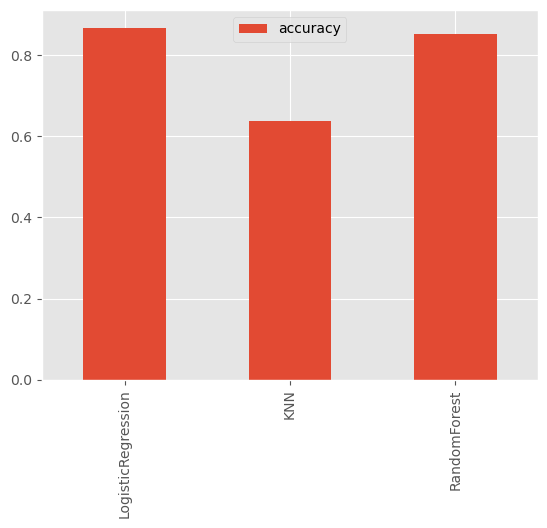

In [130]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

model_compare.T.plot(kind="bar")

Now we've got a baseline model... and we know our baseline model's first predictions aren'what we should base our next steps off. 

What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation.
* Precision
* Recall
* F1 score
* Classification Report
* Area under the curve AUC

In [131]:
# Proceed to look how to tune it.

# Let's tune KNN
train_scores  = []
test_scores = []

# Create a list of different values for N neighbors
neighbors = range(1,21)

# Set up Knn instance
knn = KNeighborsClassifier()

# Loop Through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the train scores
    train_scores.append(knn.score(X_train, y_train))


    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [132]:
train_scores

[1.0,
 0.8057851239669421,
 0.7851239669421488,
 0.7520661157024794,
 0.768595041322314,
 0.756198347107438,
 0.7355371900826446,
 0.7272727272727273,
 0.7148760330578512,
 0.6983471074380165,
 0.731404958677686,
 0.6942148760330579,
 0.6983471074380165,
 0.6942148760330579,
 0.6859504132231405,
 0.6776859504132231,
 0.6859504132231405,
 0.6611570247933884,
 0.6776859504132231,
 0.6652892561983471]

In [133]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082]

Maximum KNN score on the test data: 72.13%


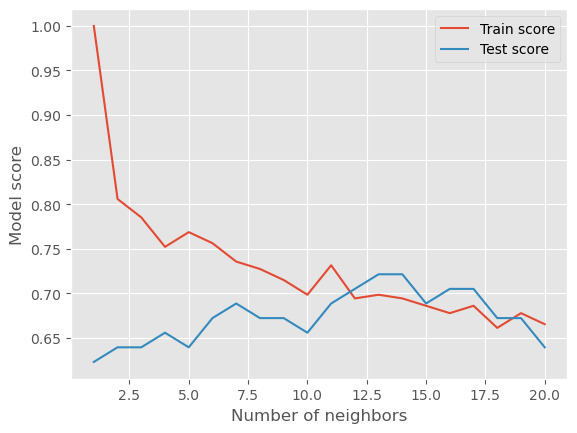

In [134]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearch CV

How to tune a logistic regression machine learning model in python?
Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()
...Using hyperparameter tuning.

In [135]:
# Create a hyperparameter grid for Logistic Regresion
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}


Now we've got hyperparameter grids  setup for  each of our models, let's  tune them using randomized  search  cv


In [136]:
#  Tune LogisticRegression

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


# Fit random hyperparameter search model for Logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [137]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [138]:
rs_log_reg.score(X_test,  y_test)

0.8360655737704918

Now we've tuned `LogisticRegression()`, let's do the same for random forest classifier

In [139]:
# Set up random.seed()

np.random.seed(42)

# Set up  hyperparameter search for random forest classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),  
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True
                          )

#Fit random hyperparameter search model for logistic regression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [140]:
# Find the best estimator
rs_rf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=19, n_estimators=310)

In [141]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [142]:
# Evaluate the randomized search RandomforestClassifier Model
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyper parameter tuning with gridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...


In [143]:
# Different hyperparameters for our ligisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
 }

# Set up grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter seaarch model.
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [144]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [145]:
# Evaluate the grid search logistic regression model
gs_log_reg.score(X_test, y_test)

0.8688524590163934

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...And it would be great if cross validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions

In [146]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [147]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [148]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

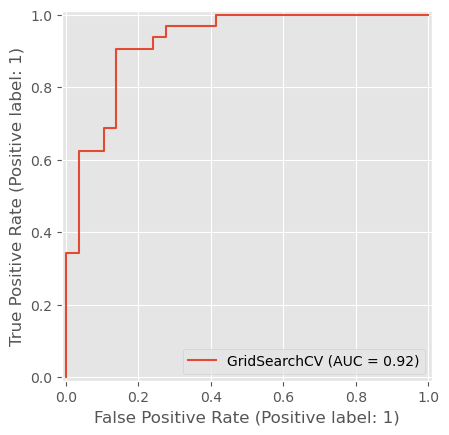

In [149]:
# Plot roc curve and calculate the AUC metrics
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


In [150]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 4 28]]


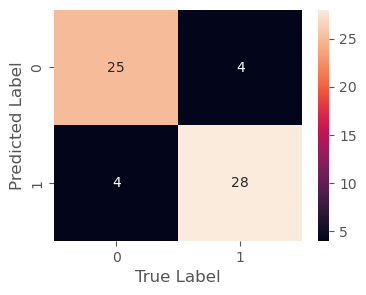

In [151]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(4,3), ncols=1, nrows=1)

    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True,
                    cbar=True)

    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC, and a confusioon matrix, let's get a classification report as well as cross-validated precision recall and f1 score.

In [152]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Calculate evaluation matrix using cross-validation

We're going to calculate accuracy, precision, recall and f1 score of our model using cross-validation and to do so we'll be using `cros_sval_score()`.



In [153]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [154]:
# Create a new classifier with best parameters

clf = LogisticRegression(C=0.7278953843983146, solver="liblinear")


In [155]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc = cv_acc.mean()

In [156]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")

cv_precision = cv_precision.mean()

In [157]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")

cv_recall = cv_recall.mean()

In [158]:
# Cross validated f1
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1 =  cv_f1.mean()

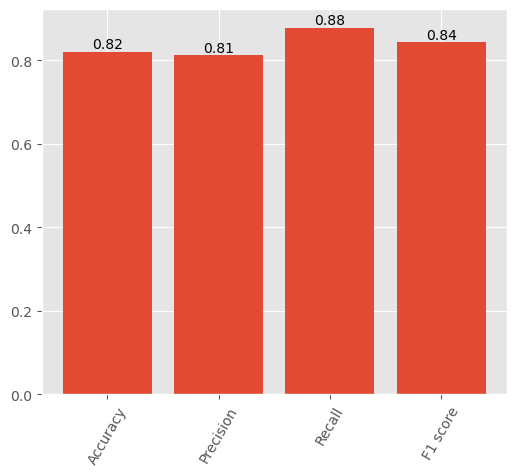

In [159]:
# Visualize our cross validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1 score": cv_f1
                          }, index=[0],
                         
                    )

met_colums =  cv_metrics.columns.values
met_heights = cv_metrics.values[0]

fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1)
bars = ax.bar(met_colums, met_heights)


for bar in bars:
    width = bar.get_width()/2 + bar.get_x()
    height = bar.get_height()
    ax.text(width, height, s=f"{round(height,2)}", va="bottom", ha="center")

# Here we rotate
plt.xticks(rotation=60)

plt.show()

### Feature importance

Feature importance is another way of asking which features contributed most to the outcomes of the model and how did they contribute?


Finding feature importance is different for each machine learning model.

Example of search:
"How to find feature importance using model X"

Let's find the feature importance for our LogisticRegression model...

In [160]:
# Fit an instance of logistic regression

gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [161]:
clf =  LogisticRegression(C=0.7278953843983146, solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.7278953843983146, solver='liblinear')

In [162]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,132.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [163]:
# Ceck coef_

clf.coef_

array([[ 0.00532184, -1.22905752,  0.77170558, -0.01141374, -0.00196328,
         0.08918759,  0.48870467,  0.0242766 , -0.8317906 , -0.61220948,
         0.65756255, -0.76545059, -0.83150063]])

In [164]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,132.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [165]:
# Match coef's of features to columns

feature_dict =  dict(zip(df.columns, list(clf.coef_[0])))


feature_dict

{'age': 0.005321842486650104,
 'sex': -1.22905751875306,
 'cp': 0.7717055820968551,
 'trestbps': -0.011413744284480757,
 'chol': -0.0019632756624232495,
 'fbs': 0.08918759245635878,
 'restecg': 0.4887046711395032,
 'thalach': 0.024276604563676484,
 'exang': -0.8317905987984243,
 'oldpeak': -0.6122094762001652,
 'slope': 0.6575625545816038,
 'ca': -0.7654505897215687,
 'thal': -0.8315006319863149}

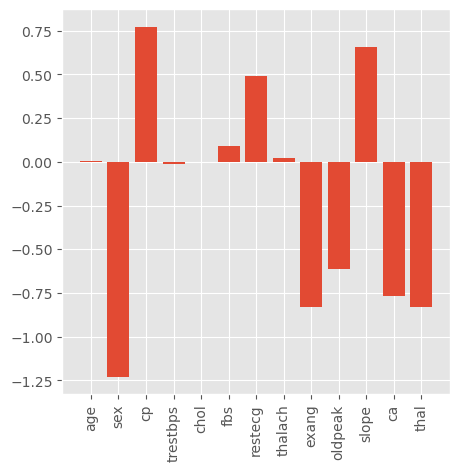

In [166]:
# Visualize feature importance
feature_df = pd.DataFrame(data=feature_dict, index=[0])

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))


ax.bar(feature_df.columns, feature_df.values[0])

plt.xticks(rotation=90)

plt.show()

In [167]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [168]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope- Slope of the peak exercise ST segment :

* 0 = upsloping: better heart rate with excercise (uncommon)
* 1 = flat: minimal change (typical healthy heart)
* 2 = downsloping: signs of unhealthy heart



# 6. Experimentation

if we haven't hit our evaluation metric yet... ask ourselves...

* Could we collect mode data?
* Could we try a better model? Like Catboost or XGBoost?
* Could we improve the current models (Beyond what we've already done so far)
* If our model is good enough (we have  hit  our evaluation metric), how would we export it and share it with others?
